# Session 3.2 - Pre Class

## Exercise 11.9

In [1]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
plt.style.use('ggplot')


import pylab as PL
import random as RD
import scipy as SP
import numpy as np

RD.seed()

width = 100
height = 100
empty, tree, fire, char = range(4)

def init(initProb):
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig
    
    still_spreading = False
    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
                            still_spreading = True
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config
    return still_spreading

# import pycxsimulator
# pycxsimulator.GUI().start(func=[init,draw,step])

### Time until fire stops spreading

In [2]:
initial_density = np.arange(0, 1, 0.05)
time_of_burn = []
Ntests = 5

for dens in initial_density:
    times = []
    print("density: {d}".format(d=dens))
    for _ in range(Ntests):
        init(dens)
        for i in range(150):
            if not step():
                break
        times.append(i)
    time_of_burn.append(np.mean(times))
    print(times)

density: 0.0
[0, 0, 0, 0, 0]
density: 0.05
[0, 0, 2, 2, 2]
density: 0.1
[1, 1, 1, 2, 0]
density: 0.15000000000000002
[0, 1, 1, 6, 0]
density: 0.2
[1, 3, 2, 4, 7]
density: 0.25
[2, 6, 0, 3, 0]
density: 0.30000000000000004
[1, 2, 3, 5, 23]
density: 0.35000000000000003
[14, 2, 12, 11, 28]
density: 0.4
[19, 9, 149, 4, 110]
density: 0.45
[90, 117, 92, 126, 93]
density: 0.5
[69, 80, 76, 75, 75]
density: 0.55
[68, 68, 68, 66, 66]
density: 0.6000000000000001
[63, 61, 63, 60, 61]
density: 0.65
[59, 58, 60, 59, 62]
density: 0.7000000000000001
[57, 59, 56, 56, 58]
density: 0.75
[56, 56, 56, 55, 55]
density: 0.8
[54, 55, 54, 54, 53]
density: 0.8500000000000001
[53, 53, 53, 53, 53]
density: 0.9
[52, 52, 52, 52, 52]
density: 0.9500000000000001
[51, 51, 51, 51, 51]


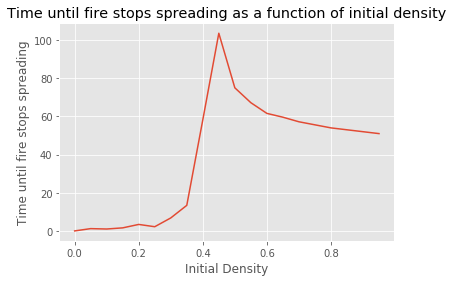

In [11]:
plt.plot(initial_density, time_of_burn)
plt.title("Time until fire stops spreading as a function of initial density")
plt.xlabel("Initial Density")
plt.ylabel("Time until fire stops spreading")
plt.show()

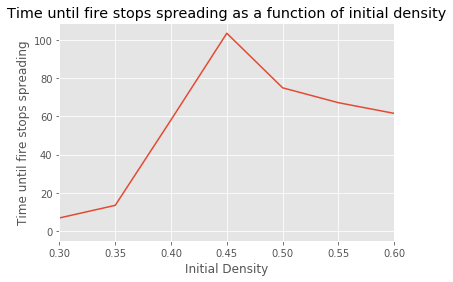

In [12]:
plt.plot(initial_density, time_of_burn)
plt.title("Time until fire stops spreading as a function of initial density")
plt.xlabel("Initial Density")
plt.ylabel("Time until fire stops spreading")
plt.xlim(0.3, 0.6)
plt.show()

### Total Burned Area

In [10]:
initial_density = np.arange(0, 1, 0.05)
total_burned_area = []
Ntests = 5

for dens in initial_density:
    areas = []
    print("density: {d}".format(d=dens))
    for _ in range(Ntests):
        init(dens)
        for i in range(150):
            if not step():
                break
        unique, counts = np.unique(config, return_counts=True)
        areas.append(counts[-1])
    total_burned_area.append(np.mean(areas))
    print(areas, np.mean(areas))

density: 0.0
[1, 1, 1, 1, 1]
density: 0.05
[1, 1, 2, 1, 1]
density: 0.1
[2, 3, 3, 2, 1]
density: 0.15000000000000002
[4, 4, 3, 2, 3]
density: 0.2
[15, 2, 1, 6, 7]
density: 0.25
[18, 5, 4, 18, 11]
density: 0.30000000000000004
[42, 80, 36, 50, 1]
density: 0.35000000000000003
[56, 296, 249, 84, 211]
density: 0.4
[2931, 134, 705, 901, 159]
density: 0.45
[4188, 4365, 4272, 4349, 4324]
density: 0.5
[4953, 5012, 4870, 4915, 4994]
density: 0.55
[5519, 5462, 5479, 5474, 5565]
density: 0.6000000000000001
[6064, 6013, 5992, 6001, 5960]
density: 0.65
[6475, 6483, 6461, 6518, 6427]
density: 0.7000000000000001
[7085, 7050, 6973, 7001, 6996]
density: 0.75
[7566, 7547, 7466, 7512, 7514]
density: 0.8
[8021, 8026, 8031, 7957, 7999]
density: 0.8500000000000001
[8496, 8590, 8477, 8468, 8504]
density: 0.9
[9026, 9025, 9033, 9046, 9007]
density: 0.9500000000000001
[9488, 9486, 9489, 9498, 9525]


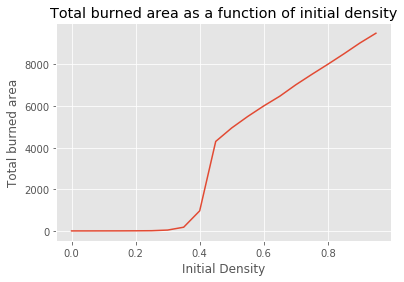

In [14]:
plt.plot(initial_density, total_burned_area)
plt.title("Total burned area as a function of initial density")
plt.xlabel("Initial Density")
plt.ylabel("Total burned area")
plt.show()

In [17]:
initial_density = np.arange(0.35, 0.5, 0.01)
total_burned_area = []
Ntests = 5

for dens in initial_density:
    areas = []
    print("density: {d}".format(d=dens))
    for _ in range(Ntests):
        init(dens)
        for i in range(150):
            if not step():
                break
        unique, counts = np.unique(config, return_counts=True)
        areas.append(counts[-1])
    total_burned_area.append(np.mean(areas))
    print(areas, np.mean(areas))

density: 0.35
[1, 15, 27, 10, 11]
density: 0.36
[127, 8, 523, 486, 70]
density: 0.37
[11, 192, 13, 2, 2]
density: 0.38
[1518, 1326, 143, 10, 307]
density: 0.39
[95, 2591, 487, 1578, 1467]
density: 0.4
[3599, 61, 5, 49, 205]
density: 0.41000000000000003
[2704, 214, 379, 2422, 2855]
density: 0.42000000000000004
[1567, 3492, 3598, 3078, 3427]
density: 0.43000000000000005
[4096, 3501, 3936, 3891, 3829]
density: 0.44000000000000006
[3977, 3988, 4189, 4129, 4064]
density: 0.45000000000000007
[4252, 4194, 4360, 4085, 4340]
density: 0.4600000000000001
[4379, 4512, 4294, 4254, 4252]
density: 0.4700000000000001
[4567, 4662, 4617, 4559, 4591]
density: 0.4800000000000001
[4675, 4759, 4639, 4, 4557]
density: 0.4900000000000001
[4735, 4850, 4797, 4729, 4772]
density: 0.5000000000000001
[4894, 5081, 4944, 4857, 4861]


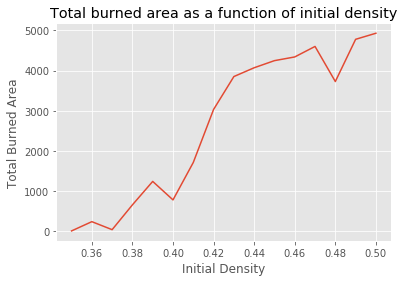

In [18]:
plt.plot(initial_density, total_burned_area)
plt.title("Total burned area as a function of initial density")
plt.xlabel("Initial Density")
plt.ylabel("Total Burned Area")
# plt.xlim(0.3, 0.6)
plt.show()

In [19]:
initial_density = np.arange(0.35, 0.5, 0.01)
total_burned_area = []
Ntests = 10

for dens in initial_density:
    areas = []
    print("density: {d}".format(d=dens))
    for _ in range(Ntests):
        init(dens)
        for i in range(150):
            if not step():
                break
        unique, counts = np.unique(config, return_counts=True)
        areas.append(counts[-1])
    total_burned_area.append(np.mean(areas))
    print(areas, np.mean(areas))

density: 0.35
[257, 18, 442, 54, 17, 26, 633, 2, 78, 463] 199.0
density: 0.36
[769, 204, 1268, 44, 5, 10, 234, 1, 166, 5] 270.6
density: 0.37
[1136, 24, 479, 283, 15, 3, 514, 529, 245, 148] 337.6
density: 0.38
[299, 1971, 212, 283, 2203, 12, 1976, 1674, 336, 130] 909.6
density: 0.39
[15, 2773, 975, 1481, 1835, 2516, 219, 161, 975, 156] 1110.6
density: 0.4
[1034, 3323, 3385, 2604, 2408, 3172, 2343, 1571, 2573, 2491] 2490.4
density: 0.41000000000000003
[43, 1973, 3519, 1538, 3524, 2664, 1831, 3063, 13, 2780] 2094.8
density: 0.42000000000000004
[3776, 2150, 3509, 3819, 3444, 3651, 3751, 3642, 3446, 3781] 3496.9
density: 0.43000000000000005
[3962, 3980, 3687, 4013, 3835, 4128, 4081, 3799, 3924, 3746] 3915.5
density: 0.44000000000000006
[4006, 3965, 4051, 4245, 3889, 3959, 3996, 4250, 3999, 2] 3636.2
density: 0.45000000000000007
[4305, 4298, 4248, 4301, 4176, 4004, 4267, 4409, 4143, 4343] 4249.4
density: 0.4600000000000001
[4413, 4352, 4437, 5, 4465, 4489, 4407, 4323, 4517, 4383] 3979.1
den

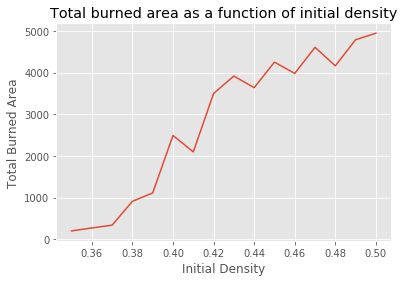

In [20]:
plt.plot(initial_density, total_burned_area)
plt.title("Total burned area as a function of initial density")
plt.xlabel("Initial Density")
plt.ylabel("Total Burned Area")
# plt.xlim(0.3, 0.6)
plt.show()